# Cluster and Plot Predictions

In [1]:
# NB! Only run this once
%cd ..
%load_ext autoreload
%autoreload 2

C:\Users\emily\Documents\repos\measuring-quality-of-life-gauteng


In [23]:
import pandas as pd
import tensorflow as tf
from dvc.api import params_show
from tensorflow.keras.models import load_model

from utils.r2_score import r_squared

label = params_show()["train"]["label"]
label

'qol_index'

In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

In [4]:
model = load_model("outputs/model/final.h5", custom_objects={"r_squared": r_squared})

In [5]:
model.summary()

Model: "ResNet50V2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [6]:
from utils.load_processed_data import load_dataset

training_data = load_dataset('train')
training_data

,index,tile,year,ward_code,services,socioeconomic_status,government_satisfaction,life_satisfaction,health,safety,participation,qol_index,split,geometry
0,0,2018-04-1179-868_00_05.tiff,2018,74804001,8.447754,2.686076,5.115498,6.728948,7.584857,4.870927,8.116613,62.041629,train,"POLYGON ((27.25708 -26.33281, 27.25708 -26.322..."
1,1,2018-04-1179-868_00_08.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.36234, 27.25708 -26.352..."
2,2,2018-04-1179-868_00_09.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.37219, 27.25708 -26.362..."
3,3,2018-04-1179-868_00_10.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.38203, 27.25708 -26.372..."
4,4,2018-04-1179-868_00_11.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.39187, 27.25708 -26.382..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,21857,2018-04-1184-870_15_10.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.06665, 28.30078 -26.056..."
16378,21858,2018-04-1184-870_15_11.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.07652, 28.30078 -26.066..."
16379,21859,2018-04-1184-870_15_12.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.08639, 28.30078 -26.076..."
16380,21860,2018-04-1184-870_15_13.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.09625, 28.30078 -26.086..."


In [7]:
training_data.shape[0]

16382

In [8]:
from utils.keras_data_format import create_generator

train_generator = create_generator(training_data, label)
train_generator

Found 16382 validated image filenames.


In [9]:
y_predictions_v2 = model.predict(train_generator)
y_predictions_v2

512/512 [==============================] - 843s 2s/step


array([[52.375935],
       [54.910175],
       [62.817844],
       ...,
       [56.80635 ],
       [54.789555],
       [56.8827  ]], dtype=float32)

In [24]:
training_data["predicted"] = y_predictions_v2
training_data["actual"] = training_data[label]
training_data

,index,tile,year,ward_code,services,socioeconomic_status,government_satisfaction,life_satisfaction,health,safety,participation,qol_index,split,geometry,prediction,predicted,actual
0,0,2018-04-1179-868_00_05.tiff,2018,74804001,8.447754,2.686076,5.115498,6.728948,7.584857,4.870927,8.116613,62.041629,train,"POLYGON ((27.25708 -26.33281, 27.25708 -26.32296, 27.24609 -26.32296, 27.24609 -26.33281, 27.25708 -26.33281))",52.375935,52.375935,62.041629
1,1,2018-04-1179-868_00_08.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.36234, 27.25708 -26.35250, 27.24609 -26.35250, 27.24609 -26.36234, 27.25708 -26.36234))",54.910175,54.910175,63.701792
2,2,2018-04-1179-868_00_09.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.37219, 27.25708 -26.36234, 27.24609 -26.36234, 27.24609 -26.37219, 27.25708 -26.37219))",62.817844,62.817844,63.701792
3,3,2018-04-1179-868_00_10.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.38203, 27.25708 -26.37219, 27.24609 -26.37219, 27.24609 -26.38203, 27.25708 -26.38203))",54.525311,54.525311,63.701792
4,4,2018-04-1179-868_00_11.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.39187, 27.25708 -26.38203, 27.24609 -26.38203, 27.24609 -26.39187, 27.25708 -26.39187))",57.605164,57.605164,63.701792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,21857,2018-04-1184-870_15_10.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.06665, 28.30078 -26.05678, 28.28979 -26.05678, 28.28979 -26.06665, 28.30078 -26.06665))",54.054348,54.054348,61.696010
16378,21858,2018-04-1184-870_15_11.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.07652, 28.30078 -26.06665, 28.28979 -26.06665, 28.28979 -26.07652, 28.30078 -26.07652))",59.651901,59.651901,61.696010
16379,21859,2018-04-1184-870_15_12.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.08639, 28.30078 -26.07652, 28.28979 -26.07652, 28.28979 -26.08639, 28.30078 -26.08639))",56.806351,56.806351,61.696010
16380,21860,2018-04-1184-870_15_13.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.09625, 28.30078 -26.08639, 28.28979 -26.08639, 28.28979 -26.09625, 28.30078 -26.09625))",54.789555,54.789555,61.696010


In [46]:
training_data[training_data["ward_code"]=='79800070']

,index,tile,year,ward_code,services,socioeconomic_status,government_satisfaction,life_satisfaction,health,safety,participation,qol_index,split,geometry,prediction,predicted,actual
2501,3603,2018-04-1182-869_10_07.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.89429 -26.19488, 27.89429 -26.18502, 27.88330 -26.18502, 27.88330 -26.19488, 27.89429 -26.19488))",57.137581,57.137581,71.823778
2502,3604,2018-04-1182-869_11_07.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.90527 -26.19488, 27.90527 -26.18502, 27.89429 -26.18502, 27.89429 -26.19488, 27.90527 -26.19488))",58.752945,58.752945,71.823778
2503,3605,2018-04-1182-869_11_08.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.90527 -26.20473, 27.90527 -26.19488, 27.89429 -26.19488, 27.89429 -26.20473, 27.90527 -26.20473))",55.144718,55.144718,71.823778
2505,3607,2018-04-1182-869_12_05.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.91626 -26.17516, 27.91626 -26.16530, 27.90527 -26.16530, 27.90527 -26.17516, 27.91626 -26.17516))",63.791779,63.791779,71.823778
2506,3608,2018-04-1182-869_12_06.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.91626 -26.18502, 27.91626 -26.17516, 27.90527 -26.17516, 27.90527 -26.18502, 27.91626 -26.18502))",62.388195,62.388195,71.823778
2507,3609,2018-04-1182-869_12_07.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.91626 -26.19488, 27.91626 -26.18502, 27.90527 -26.18502, 27.90527 -26.19488, 27.91626 -26.19488))",55.099182,55.099182,71.823778
2508,3610,2018-04-1182-869_12_08.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.91626 -26.20473, 27.91626 -26.19488, 27.90527 -26.19488, 27.90527 -26.20473, 27.91626 -26.20473))",55.938705,55.938705,71.823778
2512,3614,2018-04-1182-869_13_05.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.92725 -26.17516, 27.92725 -26.16530, 27.91626 -26.16530, 27.91626 -26.17516, 27.92725 -26.17516))",58.848759,58.848759,71.823778
2513,3615,2018-04-1182-869_13_06.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.92725 -26.18502, 27.92725 -26.17516, 27.91626 -26.17516, 27.91626 -26.18502, 27.92725 -26.18502))",55.790756,55.790756,71.823778
2514,3616,2018-04-1182-869_13_07.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.92725 -26.19488, 27.92725 -26.18502, 27.91626 -26.18502, 27.91626 -26.19488, 27.92725 -26.19488))",58.377399,58.377399,71.823778


In [37]:
# this is why I need year :')
grouped_data = training_data[['ward_code', 'year', "actual", "predicted"]].groupby(['ward_code', 'year'], as_index=False).mean()
grouped_data

,ward_code,year,actual,predicted
0,74201001,2018,75.001447,58.314491
1,74201001,2021,68.369627,56.120312
2,74201004,2018,69.295152,56.882767
3,74201004,2021,68.663389,57.453629
4,74201005,2018,70.136221,57.048145
...,...,...,...,...
413,79900104,2021,57.629835,57.116444
414,79900105,2018,56.324795,56.839233
415,79900105,2021,50.805601,57.078159
416,79900107,2018,55.191789,58.198479


In [39]:
from matplotlib import pyplot as plt

def plot_actual_vs_predicted(df: pd.DataFrame, year: str):
    y_actual = df[df["year"]==year]["actual"]
    y_pred = df[df["year"]==year]["predicted"]
    plt.scatter(y_actual, y_pred, marker='.')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {year}')
    plt.show()

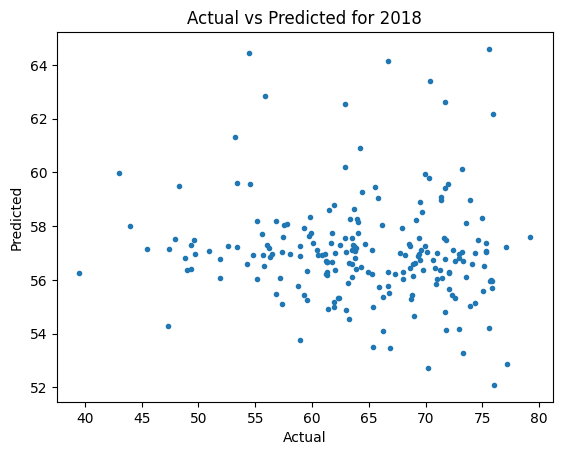

In [40]:
# Plot ward actual vs ward predicted on scatter for 2018
plot_actual_vs_predicted(grouped_data, '2018')

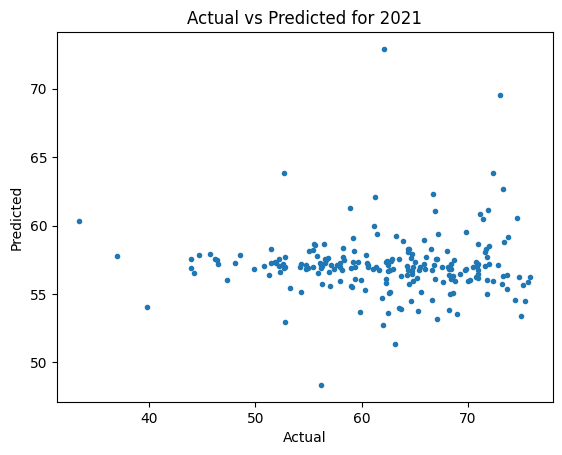

In [41]:
plot_actual_vs_predicted(grouped_data, '2021')

In [ ]:
# Todo plot predicted on map